In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
##generate synthetic web pages
webpages = []
for i in range(100000):
  webpages.append(f"Page {i + 1}")
#print(webpages)

##generate random citation counts for each webpage
##between 1 and 50 for simplicity
citation_count = []
for i in range(100000):
  citation_count.append(np.random.randint(1, 50))
#print(citation_count)

In [ ]:
##use an established keyword corpus
import nltk
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
##extract categories and keywords, and use a couple for illustration purposes
all_categories = brown.categories()
all_words = brown.words()
select_cats = ['science_fiction', 'government', 'news', 'religion', 'humor']
corpus = {}

##go through selected categories, extract all of the lowercase
##words longer than 4 letters for each category, add to dictionary
##to avoid duplicates
for category in select_cats:
  corpus[category] = []
  total_words = brown.words(categories = category)
  for word in total_words:
    if len(word) > 4:
      if word.lower() not in corpus[category]:
        corpus[category].append(word.lower())

In [ ]:
##for illustration purposes of how I used corpus
for category in select_cats:
  print(f"Category: {category}")
  print(f"Sample Keywords: {', '.join(corpus[category][:20])}")
  print()

Category: science_fiction
Sample Keywords: himself, closer, brothers, merge, without, self's, integrity, stopped, cherish, brother, selves, threes-fulfilled, corporate, discorporate, precious, earth, unknown, powers, three, would

Category: government
Sample Keywords: office, business, economics, department, commerce, provides, basic, measures, national, economy, current, analysis, short-run, changes, economic, situation, outlook, develops, analyzes, income

Category: news
Sample Keywords: fulton, county, grand, friday, investigation, atlanta's, recent, primary, election, produced, evidence, irregularities, place, further, term-end, presentments, executive, committee, which, over-all

Category: religion
Sample Keywords: result, although, still, distinction, there, confusion, meaning, basic, terms, employed, meant, spirit, matter, generally, taken, granted, though, referred, direct, axiomatic

Category: humor
Sample Keywords: among, these, hinkle, identified, photograph, barco, seems, f

In [ ]:
##generate 100000 random numbers to represent UNIX timestamps for publication dates
unix = []
for i in range(100000):
  unix.append(random.randint(10000000, 1500000000))

In [ ]:
##assign components to each node, using random categories for simplicity
nodes = {}
for i, page in enumerate(webpages):
  category = random.choice(select_cats)
  nodes[page] = {'citation_count': citation_count[i],
                 'category': category, 'date': unix[i]}

##add random edges to other nodes to represent references,
##use a set to avoid duplicates
edges = set()
for i, page in enumerate(webpages):
  references = random.randint(1, 4)
  for j in range(references):
    target = random.choice(webpages)
    if target != page:
      edges.add((page, target))
edges = list(edges)

In [ ]:
##visualization note this block is not currently functionable with such a large data set
colors = {'science_fiction' : 'red', 'government' : 'blue', 'news' : 'green',
          'religion' : 'purple', 'humor' : 'yellow'}

##standardize dates for opacity
min_date = min(components['date'] for components in nodes.values())
max_date = max(components['date'] for components in nodes.values())

##generate random positions for nodes, dictating size based on citation counts
##and colors based on category
positions = {}
for page, components in nodes.items():
  positions[page] = (random.uniform(0, 1), random.uniform(0, 1))
  size = components['citation_count'] * 5
  color = colors[components['category']]
  plt.scatter(positions[page][0], positions[page][1], s = size, c = color,
              alpha = ((components['date'] - min_date) / (max_date - min_date)))

##plot edges that were computed before
for src, targ in edges:
  source = positions[src]
  target = positions[targ]
  plt.plot([source[0], target[0]], [source[1], target[1]], linewidth = 0.2)

plt.title("Node Visualization")
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fa5626051b0> (for post_execute):


KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


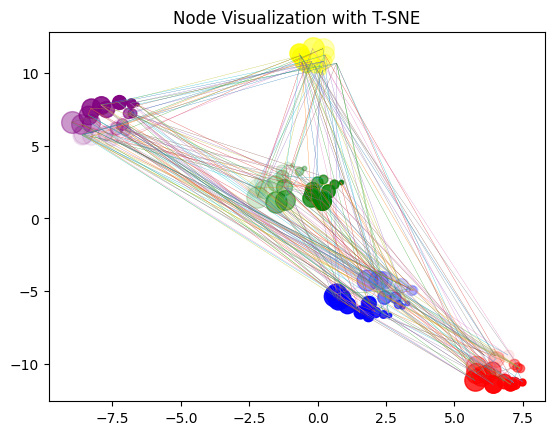

In [ ]:
##using tsne for position rather than random generation
from sklearn.manifold import TSNE

##standardize node components and make category numerical
attributes = []
for components in nodes.values():
  citation = components['citation_count'] / 50
  date = (components['date'] - min_date) / (max_date - min_date)
  index = list(colors.keys()).index(components['category'])
  attributes.append([citation, date, index])

##fit tsne to an array because list doesnt work
arr = np.array(attributes)
fit = TSNE(n_components = 2, n_iter = 300, perplexity = 20, random_state = 1000)
tsne = fit.fit_transform(arr)

##use positions from tsne
positions = {page: (pos[0], pos[1]) for page, pos in zip(nodes.keys(), tsne)}
for page, components in nodes.items():
  size = components['citation_count'] * 5
  color = colors[components['category']]
  plt.scatter(positions[page][0], positions[page][1], s = size, c = color,
              alpha = ((components['date'] - min_date) / (max_date - min_date)))

##plot edges that were computed before
for src, targ in edges:
  source = positions[src]
  target = positions[targ]
  plt.plot([source[0], target[0]], [source[1], target[1]], linewidth = 0.2)

plt.title("Node Visualization with T-SNE")
plt.show()

# THIS IS USEFUL

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
##generate synthetic web pages
papers = []
for i in range(10000):
  papers.append(f"Paper {i + 1}")
#print(papers)

##generate random article id, ensuring uniqueness
ids = random.sample(range(5000000), len(papers))

##generate references to other pages to randomly represent each paper connection
references = []
for i in range(len(papers)):
  ##use random sample without replacement
  references.append(random.sample(papers, random.randint(1, 10)))

##generate 10000 random numbers to represent UNIX timestamps for publication dates
unix = []
for i in range(10000):
  unix.append(random.randint(10000000, 1500000000))

In [ ]:
##create nodes with all respective components
nodes = []
for i in range(len(papers)):
  nodes.append({'id' : ids[i], 'name' : papers[i],
                'references' : references[i], 'date' : unix[i]})

In [ ]:
##apply tsne on the nodes after standardizing data for proper location
from sklearn.manifold import TSNE

##note the fit may take a second
components = np.array([[node['id'], node['date']] for node in nodes])
fit = TSNE(n_components = 2, n_iter = 300, perplexity = 20, random_state = 1000)
tsne = fit.fit_transform(components)

##add coordinates to feature of node
for i, node in enumerate(nodes):
  node['tsne_x'] = tsne[i, 0]
  node['tsne_y'] = tsne[i, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [ ]:
##create edges based on references
##note this may take a minute
edges = []
##perform linear search to check the references and add an edge if necessary
for node in nodes:
  for ref in node['references']:
    for targ in nodes:
      if targ['name'] == ref:
        weight = abs(node['date'] - targ['date'])
        edges.append({'source' : node['id'], 'target' : targ['id'],
                      'weight' : weight})
        break

In [ ]:
##create the graph structure
graph = {node['id'] : [] for node in nodes}
for edge in edges:
  source = edge['source']
  target = edge['target']
  weight = edge['weight']
  graph[source].append({'target' : target, 'weight' : weight})

In [ ]:
##implement BFS to find smallest number of articles from a source to a target
##note this is unweighted
from collections import deque

##following psuedocode from lecture and applying to our case
def bfs(graph, src, targ):
  ##initialize queue, count, and visited
  queue = deque([src])
  visited = set()
  count = {src : 0}

  visited.add(src)
  if src == targ:
    return 0;

  ##while the queue is not empty
  while queue:
    ##take u out and visit
    u = queue.popleft()

    ##for adjacent nodes, mark visited if not already, and check if we have reached
    for v in graph[u]:
      v_id = v['target']

      if v_id == targ:
        return count[u] + 1

      if v_id not in visited:
        visited.add(v_id)
        count[v_id] = count[u] + 1
        queue.append(v_id)

  ##return -1 if unreachable
  return -1

In [ ]:
##testing bfs
random_nodes = random.sample(list(graph.keys()), 2)
test_src = random_nodes[0]
test_targ = random_nodes[1]

print(test_src)
print(test_targ)
bfs(graph, test_src, test_targ)

1576528
4084461


5

In [ ]:
##export to json
import json

json_nodes = [
    {
        'id' : node['id'],
        'name' : node['name'],
        'tsne_x' : float(node['tsne_x']),
        'tsne_y' : float(node['tsne_y']),
        'date' : node['date']
    }
    for node in nodes
]

json_edges = [
    {
        'source' : edge['source'],
        'target' : edge['target'],
        'weight' : edge['weight']
    }
    for edge in edges
]

json_graph = {
    'nodes' : json_nodes,
    'edges' : json_edges
}

with open('graph.json', 'w') as outfile:
  json.dump(json_graph, outfile)

In [ ]:
from google.colab import files
files.download('graph.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>